In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n=100, ro=2):
    x1 = np.random.multivariate_normal(mean=[0,0], cov=np.identity(2),size=n)
    x2 = np.random.multivariate_normal(mean=[ro,ro], cov=np.identity(2),size=n)
    y1 = np.array([1 for i in range(n)])
    y2 = np.array([-1 for i in range(n)])
    y = np.concatenate((y1,y2))
    x = np.concatenate((x1,x2))
    idx = np.random.permutation(2*n)
    x = x[idx,:]
    y = y[idx]
    return x,y

def sgn(x):
    return x / abs(x)

def accuracy(y, y_hat):
    return sum(y == y_hat)/len(y)

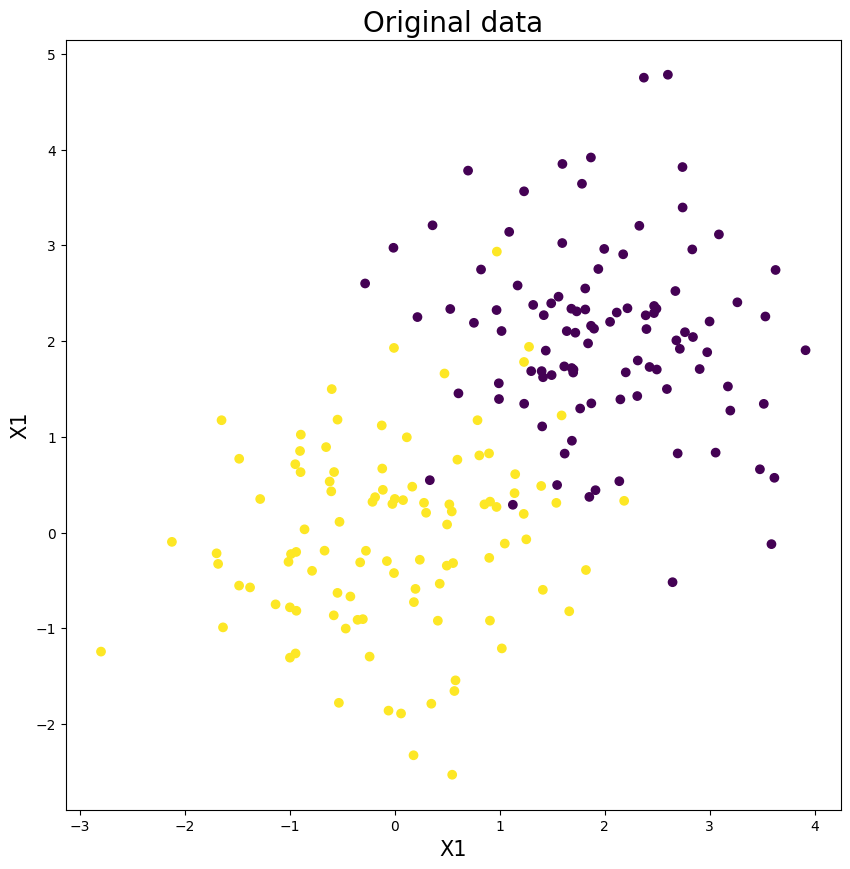

In [6]:
x,y = generate_data(ro=2)

plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X1", fontsize=15)
plt.title("Original data", fontsize=20)
plt.show()

In [126]:
np.column_stack((x, np.ones(200))) # adding ones

array([[ 1.99495270e+00,  2.96208287e+00,  1.00000000e+00],
       [-5.46930198e-01, -6.29665576e-01,  1.00000000e+00],
       [ 5.67174751e-01, -1.65430162e+00,  1.00000000e+00],
       [-9.40566826e-01, -2.02083813e-01,  1.00000000e+00],
       [ 1.01649577e+00,  2.10487288e+00,  1.00000000e+00],
       [ 5.54533596e-01, -3.18378861e-01,  1.00000000e+00],
       [-1.48378877e+00,  7.70766231e-01,  1.00000000e+00],
       [ 9.68980281e-01,  2.32383314e+00,  1.00000000e+00],
       [ 9.90391712e-01,  1.55893015e+00,  1.00000000e+00],
       [ 1.76556229e+00,  1.29556158e+00,  1.00000000e+00],
       [ 3.05659324e+00,  8.35123711e-01,  1.00000000e+00],
       [ 8.97206872e-01,  8.26862975e-01,  1.00000000e+00],
       [ 2.83396312e+00,  2.95689923e+00,  1.00000000e+00],
       [-2.83666029e-01,  2.60139816e+00,  1.00000000e+00],
       [-1.88598659e-01,  3.69917397e-01,  1.00000000e+00],
       [ 1.01912671e+00, -1.20949395e+00,  1.00000000e+00],
       [ 2.97473736e-01,  2.07055162e-01

In [269]:
from Algorithm import CoordinateDescent

from scipy.sparse import csc_matrix

cd = CoordinateDescent(C=2)
cd.fit(csc_matrix(np.column_stack((x, np.ones(200)))),y)
#cd.fit(np.column_stack((x, np.ones(200))), y)

In [270]:
w = cd.process()

In [271]:
w # the last one is the bias

array([-0.71125617, -0.6704892 ,  1.46459555])

In [260]:
y_hat = (w[0:-1] @ x.T) + w[-1]
y_hat = sgn(y_hat)

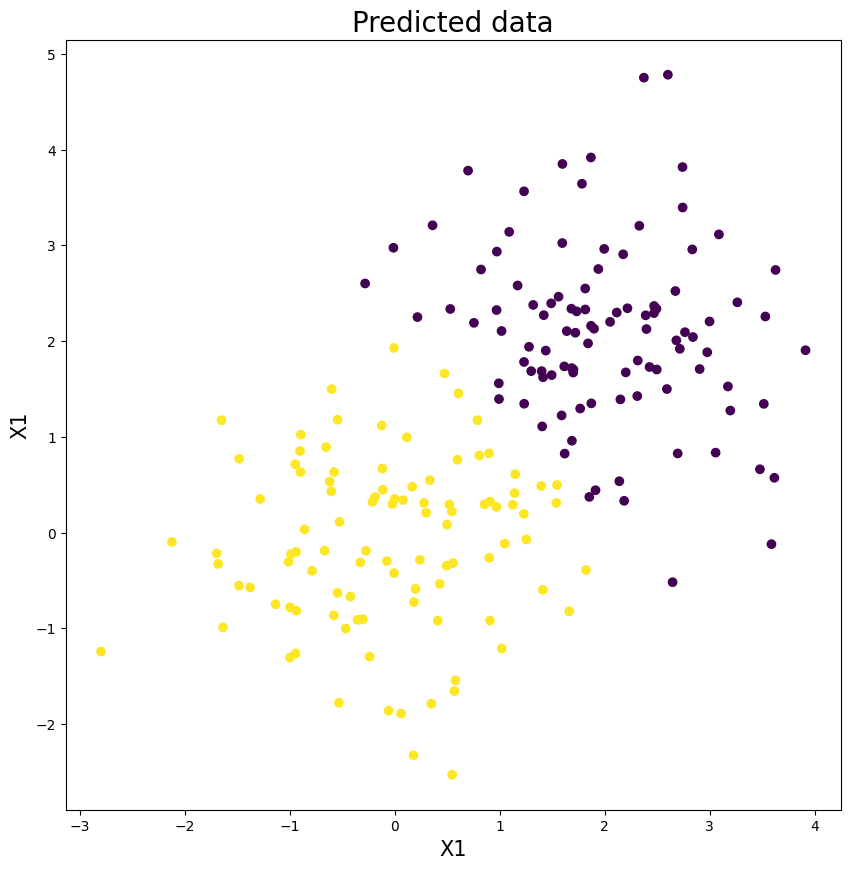

In [272]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y_hat)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X1", fontsize=15)
plt.title("Predicted data", fontsize=20)
plt.show()

In [273]:
accuracy(y, y_hat)

0.955